<a href="https://colab.research.google.com/github/kimdonggyufive/OpenReposit/blob/main/diabetes_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes example

사용한 데이터 세트는 Pima Indians Diabetes Data Set 입니다. 

미국 원주민 중 Pima 족은 원래는 당뇨병의 유병율이 적었는데, 서구식 식습관에 의해 급속도로 당뇨병에 걸렸습니다.  
그래서 당뇨병을 연구하는데 귀중한 데이터로 사용되고 있습니다.

데이터 세트는 CSV 포멧이고 총 9가지의 속성으로 구성되어 있습니다.

1.임신횟수  
2.글루코스 내성(glucose tolerance)실험 후의 혈당수치  
3.확장기 혈압(mm Hg)  
4.상완 삼두근 피부 두께 (mm)  
5.혈액내 인슐린 수치 (mu U/ml)  
6.BMI(비만도) 수치 (weight in kg/(height in m)^2)  
7.당뇨병 가족력: 계산식은 데이터세트의 출처에서 확인하세요.  
8.나이 (years)  
9.당뇨병 여부 (0 or 1; 1은 발병)  

In [ ]:
# scikit-learn 설치 확인
!pip install scikit-learn

In [ ]:
import numpy as np
import tensorflow as tf

np.random.seed(777)
tf.random.set_seed(777)

In [ ]:
dataset=np.loadtxt("diabetes.csv", delimiter=",")
x=dataset[:,:-1]
y=dataset[:,-1]

x.shape, y.shape
#다음은 TrainData와 TestData를 나누기

((759, 8), (759,))

In [ ]:
from sklearn.model_selection import train_test_split
#다음 train_data는 75% == 0.75, test_data는 25% == 0.25로 알아서 나눈다.
#random_seed는 777로 고정한다.
#머신러닝을 할때 자동으로 나눠주는 함수.
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=777)

In [ ]:
# 모델링 해보세요. 
# 3개층 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(12,activation='relu',input_shape=(8,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습 시켜 보세요.
# 마지막 validation_split data는 예측 할 데이터?
history= model.fit(x_train, y_train, batch_size=10, epochs=20,validation_split=0.2)
# epoch=8 으로 변경후 다시 학습
#history

Epoch 1/20
46/46 [==============================] - 1s 6ms/step - loss: 0.6932 - acc: 0.4879 - val_loss: 0.6783 - val_acc: 0.6842
Epoch 2/20
46/46 [==============================] - 0s 2ms/step - loss: 0.6707 - acc: 0.6418 - val_loss: 0.6570 - val_acc: 0.6579
Epoch 3/20
46/46 [==============================] - 0s 3ms/step - loss: 0.6358 - acc: 0.6462 - val_loss: 0.6295 - val_acc: 0.6579
Epoch 4/20
46/46 [==============================] - 0s 2ms/step - loss: 0.5972 - acc: 0.6637 - val_loss: 0.6040 - val_acc: 0.6754
Epoch 5/20
46/46 [==============================] - 0s 2ms/step - loss: 0.5588 - acc: 0.7077 - val_loss: 0.5774 - val_acc: 0.6930
Epoch 6/20
46/46 [==============================] - 0s 2ms/step - loss: 0.5225 - acc: 0.7407 - val_loss: 0.5542 - val_acc: 0.7456
Epoch 7/20
46/46 [==============================] - 0s 2ms/step - loss: 0.4859 - acc: 0.7780 - val_loss: 0.5347 - val_acc: 0.7544
Epoch 8/20
46/46 [==============================] - 0s 2ms/step - loss: 0.4589 - acc: 0.80

In [ ]:
# model.evaluate(x값, y값) 함수를 사용하여 모델을 평가해보세요.
scores=model.evaluate(x_test, y_test)
print(f'loss={scores[0]}, acc={scores[1]*100:.2f}%')

6/6 [==============================] - 0s 2ms/step - loss: 0.6016 - acc: 0.6895
loss=0.601569414138794, acc=68.95%


In [ ]:
# model.predict(새로운 x값) 을 사용하여 예측해보세요.
predictions=model.predict(x_test)
rounded=[round(x[0]) for x in predictions]
print('P',rounded[:10])
print('L',y_test[:10])

P [1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
L [1. 0. 1. 1. 0. 0. 1. 1. 1. 1.]


#  시각화

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

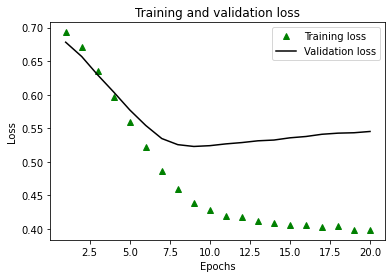

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'g^', label='Training loss')
plt.plot(epochs, val_loss, 'k', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

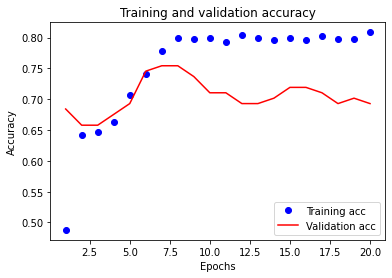

In [ ]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### epoch=8 으로 변경후 다시 학습